In [14]:
%matplotlib inline
# from IPython.display import Image
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import numpy as np
import json, os
from glob import glob
from PIL import Image
from tqdm import tnrange, tqdm

In [15]:
# config = json.load(open(os.path.expanduser("~/.thesis.conf")))
# datasets_path = Path(config['datasets'])
# db_folder = Path(config['datasets']) / 'hisdb'
# modules   = Path(config['project']) / 'src'

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:

import sys
sys.path.append('../src/')

In [17]:
from models.chen2017.transforms import *
import datasets.divahisdb as diva
import experiment.data as exd

In [18]:
import skimage.io
import skimage.segmentation as seg
from skimage.util import img_as_float, img_as_ubyte
from skimage.transform import resize, rotate
from skimage import io
import matplotlib.pyplot as plt
import argparse
 
import random as rnd
import math
from collections import namedtuple

In [19]:
env = exd.Environment()
dataset = diva.HisDBDataset(env.dataset('DIVA-HisDB'), gt=True)
page, gt = dataset[0]

In [42]:
scaler = Scale()
slic = SLIC(n_segments=5000, compactness=50)
get_tiles = SegmentTiling()
get_gt = TileGroundTruth()

In [43]:
scaled = scaler(page)
spixel = slic(scaled)
# tiles, tile_specs = get_tiles(img_as_ubyte(scaled), spixel)

In [ ]:
y = get_gt(tile_specs, gt, scaler.scale)

In [ ]:
np.sum(diva.to_class_vector(y), axis=0)

In [55]:
p = 300
# box = (slice(p,p+250), slice(p,p+250))
box = (p,p,p+500,p+500)
fig = plt.figure()
# plt.imshow(seg.mark_boundaries(img_as_ubyte(scaled)[box], spixel[box],color=(0,0,0)),cmap='flag')
marked = Image.fromarray(img_as_ubyte(seg.mark_boundaries(img_as_ubyte(scaled), spixel,color=(1,0,0))))
marked.crop(box=box).save('../doc/figures/img/mark_boundaries.jpg')

/home/jakob/miniconda3/envs/master/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


<Figure size 432x288 with 0 Axes>

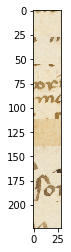

In [290]:
n = 1450
s = slice(n,n+8)
plt.imshow(np.concatenate(tiles[s]))
# print(patch_meta[s,2])
# print(y[s])
# diva.Annotations(y[s][1])
    

In [125]:

patchtes = patches[:patch_count]
patch_meta = patch_meta[:patch_count]

In [203]:
s + 8

TypeError: unsupported operand type(s) for +: 'slice' and 'int'

[1804 1805 1806 1807 1808 1809 1810 1811]
[1 1 1 1 1 1 1 1]


<Annotations.BACKGROUND: 1>

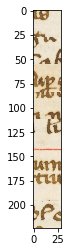

In [202]:
n = 1750
s = slice(n,n+8)
plt.imshow(np.concatenate(patches[s]))
print(patch_meta[s,2])
print(y[s])
diva.Annotations(y[s][1])

In [23]:
def img_offsets(directions=[0], width=28, jitter=7):
    """
    calculates offsets in the specified directions.
    Spacing is specified by width.
    Adds jitter
    """
    offsets = np.zeros((len(directions), 2))
    for idx, direction in enumerate(directions):
        print(direction)
        offset[idx] = [width * direction[0]  + rnd.randint(-jitter,jitter),
                       width * direction[1]  + rnd.randint(-jitter,jitter)]
    return offsets

In [185]:
y = gt[np.round(patch_meta[:,0] / scale).astype(int), np.round(patch_meta[:,1] / scale).astype(int)]

In [206]:
out = np.ones((image.shape[0], image.shape[1], 1), dtype=gt.dtype)
for x,y, snum in patch_meta[:10]:
    spixel = np.where(segments == snum)

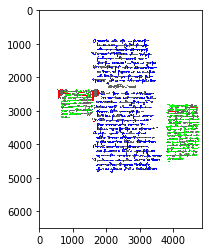

In [207]:
plt.imshow(diva.color_gt(gt))